# Optimal Time-Frequency Paritions with CEM on Speech Real Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy import ndimage
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time
from rpy2.robjects.packages import importr
from scipy.stats import gaussian_kde

In [2]:
import rpy2
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

<rpy2.rinterface_lib.sexp.NULLType object at 0x000001C0219D6E00> [RTYPES.NILSXP]

In [3]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [4]:
# Install packages
#packnames = ('seewave')
#utils.install_packages(StrVector(packnames))

# Load packages
seewave = importr('seewave')

In [8]:
def integrate_box_kde(a,b):
    return kde.integrate_box(a,b)
def evaluate_kde(mesh_positions):
    return kde.evaluate(mesh_positions)

In [9]:
from RandomPartition import RandomPartition

In [10]:
mydir_read = 'C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\IMF_train_test\\'
my_dir_read_or_sig =  "C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\New_Training_Testing_Sets\\"
res_path_if = "C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\IFs_train_test\\"

# Example 1

In [11]:
IMF_train_hc_f = np.load (mydir_read + 'IMF_train_f_hc.npy')

In [12]:
N =5000
t_N = 5
t_0 = 0
t = np.linspace(t_0,t_N,N)

In [13]:
imf1 = IMF_train_hc_f[0][100] 
imf2 = IMF_train_hc_f[1][100] 
imf3 = IMF_train_hc_f[2][100] 

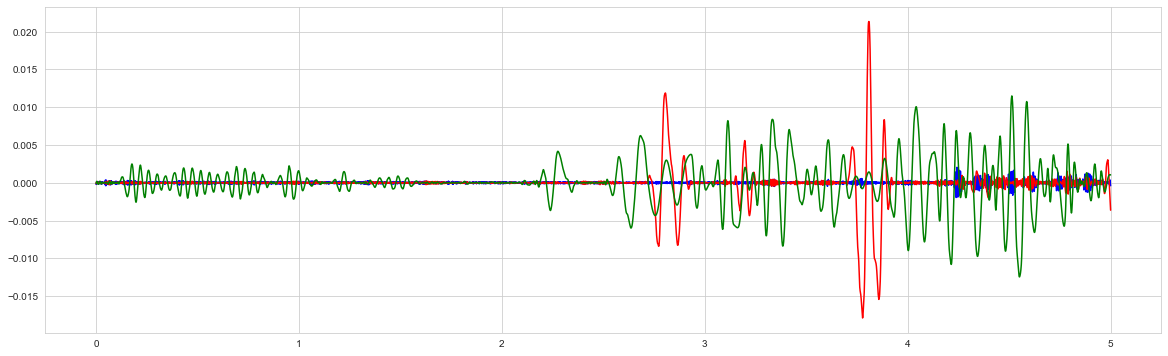

In [14]:
#IMFs plot
plt.figure(figsize=(20,6))
plt.plot(t, imf1,color = 'b')
plt.plot(t, imf2,color = 'r')
plt.plot(t, imf3,color = 'g')

In [15]:
imf11 = IMF_train_hc_f[0][100] + IMF_train_hc_f[4][100]
imf22 = IMF_train_hc_f[1][100] + IMF_train_hc_f[4][100]
imf33 = IMF_train_hc_f[2][100] + IMF_train_hc_f[4][100]

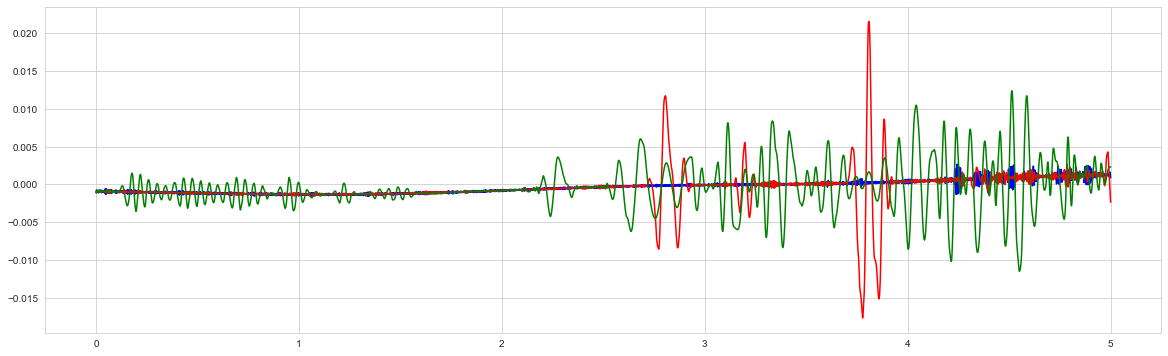

In [16]:
#IMFs plot + the residual
plt.figure(figsize=(20,6))
plt.plot(t, imf11,color = 'b')
plt.plot(t, imf22,color = 'r')
plt.plot(t, imf33,color = 'g')

In [17]:
fs = 44100
samples = 5000
t = np.arange(samples) / fs

In [18]:
inst_freq3 = [seewave.ifreq(wave = np.vstack(IMF_train_hc_f[i][100]), f = fs, plot = False) for i in range(0,3)] 
inst_freq3_2 = [np.array(inst_freq3[i][0]) for i in range(0,3)] 
inst_freq3_t =  [inst_freq3_2[i].T[0]  for i in range(0,3)] 
inst_freq3_if = [inst_freq3_2[i].T[1]  for i in range(0,3)] 

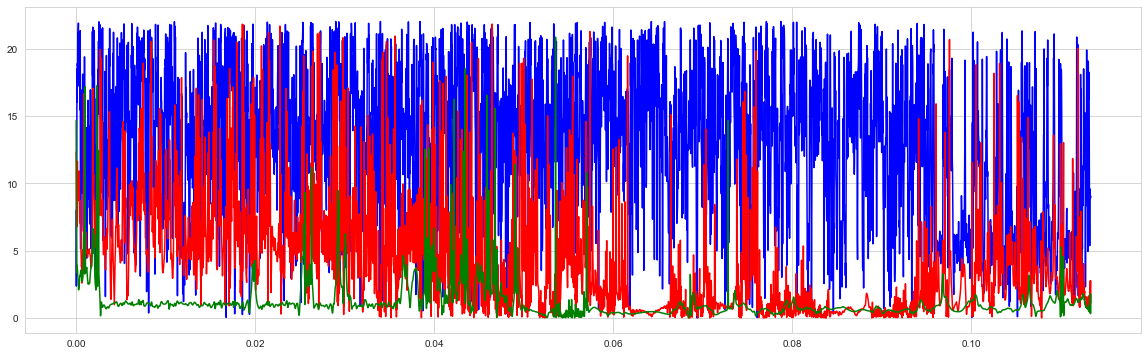

In [19]:
#IFs plot
plt.figure(figsize=(20,6))
plt.plot(inst_freq3_t[0], inst_freq3_if[0],color = 'b')
plt.plot(inst_freq3_t[1], inst_freq3_if[1],color = 'r')
plt.plot(inst_freq3_t[2], inst_freq3_if[2],color = 'g')

## Median Filtered

In [20]:
size = 5
filt_if_1 = ndimage.median_filter(inst_freq3_if[0], size=size)
filt_if_2 = ndimage.median_filter(inst_freq3_if[1], size=size)
filt_if_3 = ndimage.median_filter(inst_freq3_if[2], size=size)

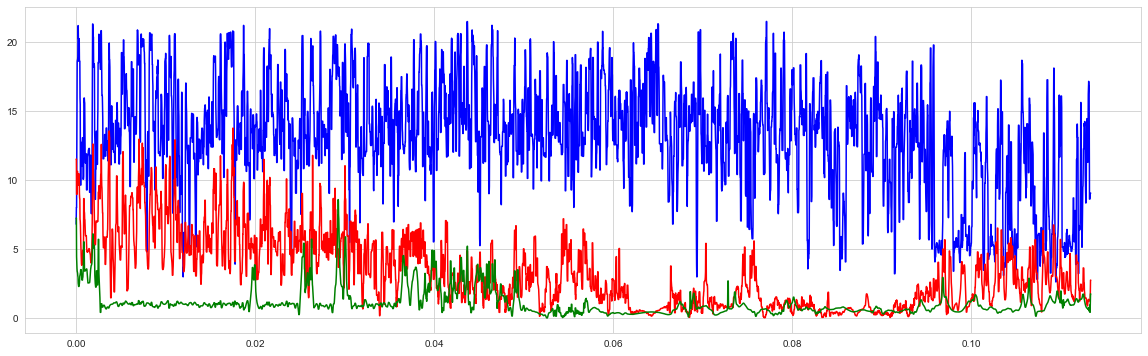

In [21]:
#IFs with median Filter
plt.figure(figsize=(20,6))
plt.plot(inst_freq3_t[0], filt_if_1,color = 'b')
plt.plot(inst_freq3_t[1], filt_if_2,color = 'r')
plt.plot(inst_freq3_t[2], filt_if_3,color = 'g')

In [22]:
w = np.concatenate([inst_freq3_if[0],inst_freq3_if[1],inst_freq3_if[2]])
K = 3

In [23]:
w = np.concatenate([filt_if_1,filt_if_2,filt_if_3])
K = 3

In [24]:
data = np.c_[np.tile(inst_freq3_t[0]*1000,K),w]  
data.shape

(15000, 2)

In [25]:
kde_bdw = 0.1
kde = gaussian_kde(data.T,bw_method= kde_bdw)

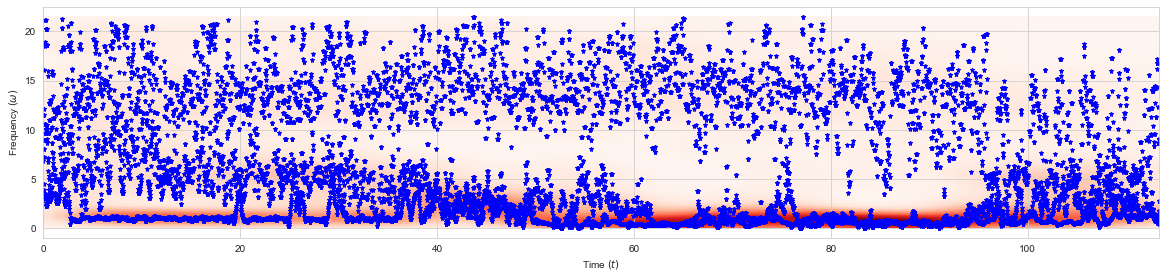

In [26]:
partition = RandomPartition(data,3,4,integrate_box_kde,evaluate_kde)   
partition.plot_KDE((20,20))

In [27]:
#TRUNCATED NORMAL
partition.estimate_partition_CEM_trun_normal(n_sim = 50, maxiter_CE = 20, \
                                             tol_ce = 0.0001, sigma2_t = 0.01,sigma2_omega = 0.01,\
                                             parallel = False,sampler = 'parallel',init_method ='regular')

Initializing partition:  11:08:56
CEM started:  11:08:56
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║11:08:56║ 0.253  ║ 0.250 ║ 0.262 ║ 0.256║ 0.758 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║11:09:06║ 0.251  ║ 0.248 ║ 0.264 ║ 0.254║ 0.697 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║11:09:16║ 0.250  ║ 0.243 ║ 0.258 ║ 0.252║ 0.855 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║11:09:26║ 0.246  ║ 0.242 ║ 0.258 ║ 0.250║ 0.910 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║11:09:37║ 0.245  ║ 0.240 ║ 0.256 ║ 0.248║ 0.654 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║11:09:48║ 0.243  ║ 0.239 ║ 0.253 ║ 0.246║ 0.871 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║11:09:59║ 0.241  ║ 0.237 ║ 0.252 ║ 0.244║ 0.883 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

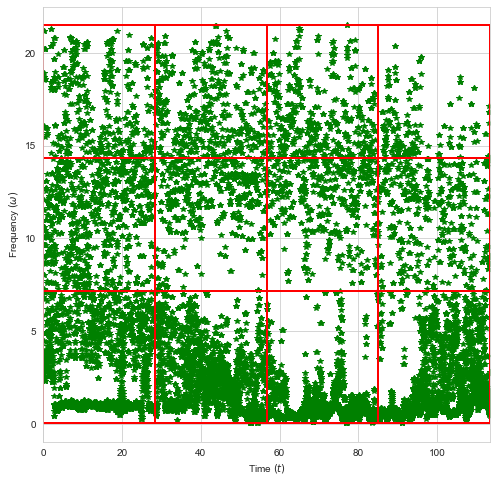

In [28]:
#INITIAL PARTITION
partition.plot_partition(partition.breaks_init, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='init_part_tn_ex1.png')

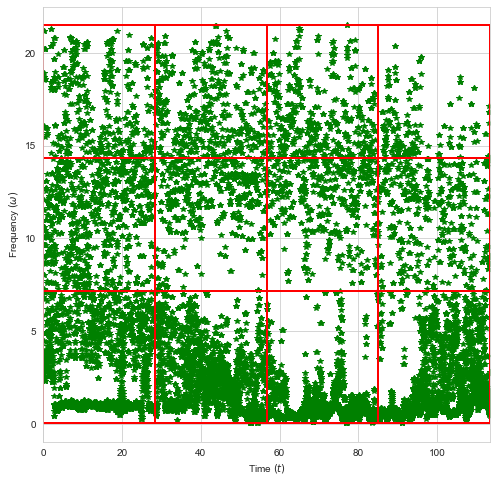

In [29]:
#FINAL PARTITION
partition.plot_partition(partition.breaks_init, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='fin_part_tn_ex1.png')

In [32]:
partition.animate_partition_fitting((8,8) ,save_plot = True, plotpath='plots/')

In [33]:
#MULTINOMIAL
partition.estimate_partition_CEM_multinom(n_sim = 50, maxiter_CE = 20,tol_ce = 0.0001, 
                                          N_grid_omega = 5000, N_grid_t = 1000, tol_omega = 1, tol_t = 1,
                                          parallel = False,sampler = 'parallel',init_method ='regular')

Initializing partition:  11:23:27
CEM started:  11:23:27
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║11:23:27║ 0.250  ║ 0.241 ║ 0.273 ║ 0.256║ 1.524 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║11:23:38║ 0.244  ║ 0.222 ║ 0.270 ║ 0.252║ 2.044 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║11:23:48║ 0.240  ║ 0.225 ║ 0.273 ║ 0.247║ 2.018 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║11:23:59║ 0.234  ║ 0.222 ║ 0.268 ║ 0.242║ 2.231 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║11:24:10║ 0.231  ║ 0.211 ║ 0.255 ║ 0.236║ 2.073 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║11:24:20║ 0.227  ║ 0.219 ║ 0.253 ║ 0.232║ 1.561 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║11:24:30║ 0.223  ║ 0.213 ║ 0.252 ║ 0.228║ 1.918 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

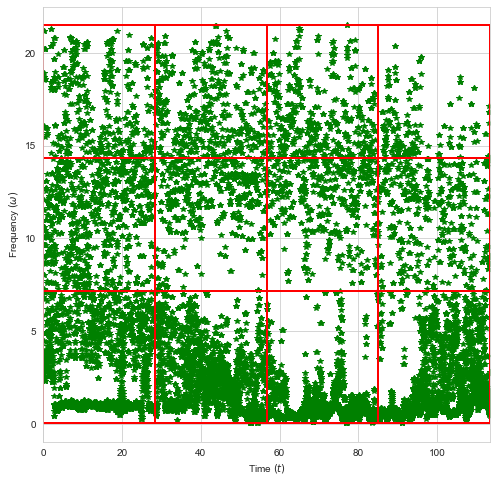

In [34]:
partition.plot_partition(partition.breaks_init, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='init_part_mn_ex1.png')

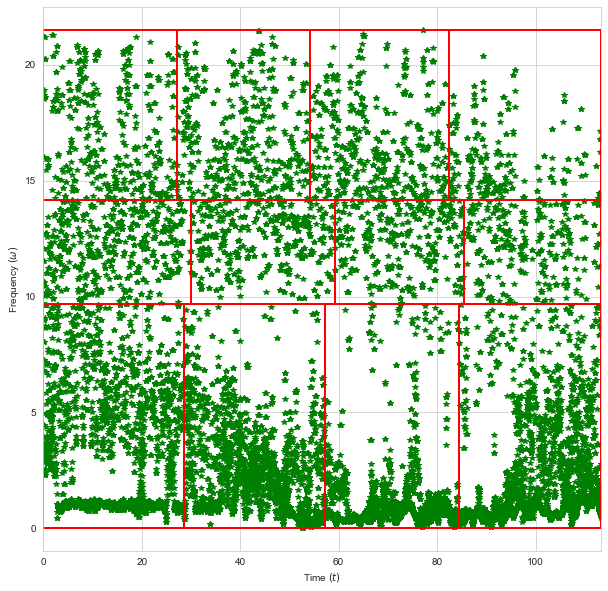

In [35]:
partition.plot_partition(partition.breaks_old, figsize = (10,10),save_plot = True,plotpath= 'plots/',plotname='fin_part_mn_ex1.png')

In [36]:
partition.animate_partition_fitting((8,8) ,save_plot = True, plotpath='plots/')

# Example 2 (some plots from the paper)

In [37]:
X_test_hc_f = np.load (my_dir_read_or_sig + 'X_test_hc_f.npy')
IMF_test_hc_f = np.load (mydir_read + 'IMF_test_hc_f.npy')

In [38]:
IF_hc_test_f = np.load(res_path_if + 'IF_test_hc_f.npy')
IF_hc_test_m = np.load(res_path_if + 'IF_test_hc_m.npy')
IF_test_hc_f_medfit = np.load(res_path_if + 'IF_test_hc_f_medfit.npy')

In [39]:
time_vec = IF_hc_test_f[0][0][:,0]
index_seg = 20

Text(0.5, 0, 'Time (s)')

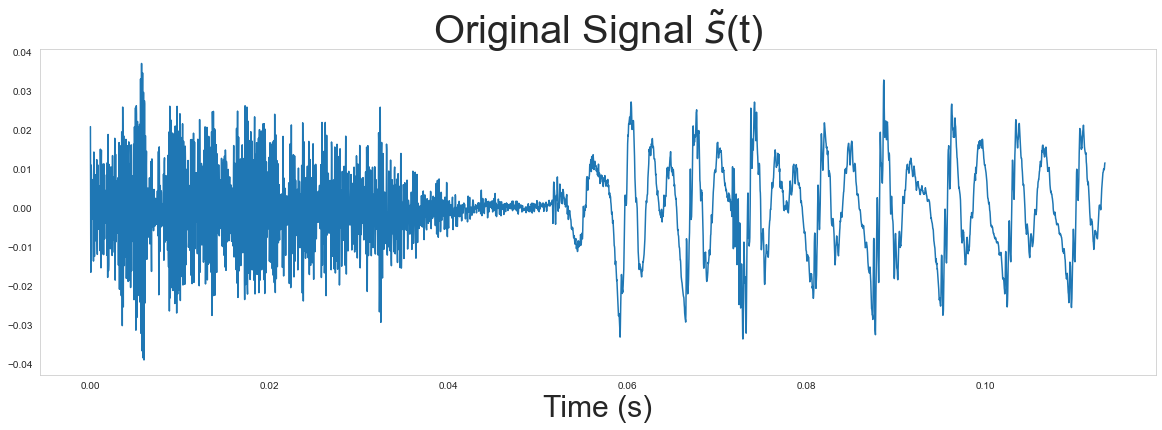

In [40]:
plt.figure(figsize=(20,6))
plt.plot(time_vec, X_test_hc_f[index_seg])
plt.grid(None)
plt.title('Original Signal $\~{s}$(t)', fontsize=40)
plt.xlabel('Time (s)', fontsize=30)

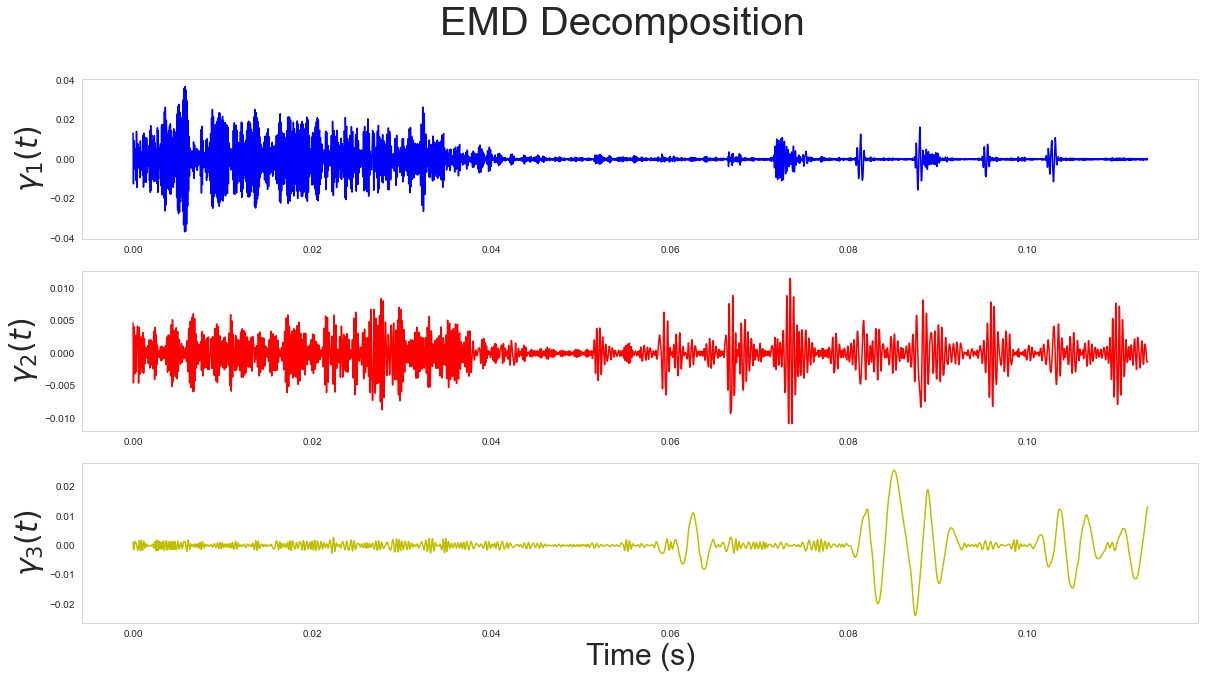

In [41]:
fig, axs = plt.subplots(3,figsize=(20,10))
fig.suptitle('EMD Decomposition', fontsize=40)
axs[0].plot(time_vec, IMF_test_hc_f[0][index_seg],color = 'b')
axs[0].set_ylabel('$\gamma_1(t)$', fontsize = 30)
axs[0].grid(None)
axs[1].plot(time_vec, IMF_test_hc_f[1][index_seg],color = 'r')
axs[1].set_ylabel('$\gamma_2(t)$', fontsize = 30)
axs[1].grid(None)
axs[2].plot(time_vec, IMF_test_hc_f[2][index_seg],color = 'y')
axs[2].set_ylabel('$\gamma_3(t)$', fontsize = 30)
axs[2].set_xlabel('Time (s)', fontsize = 30)
axs[2].grid(None)

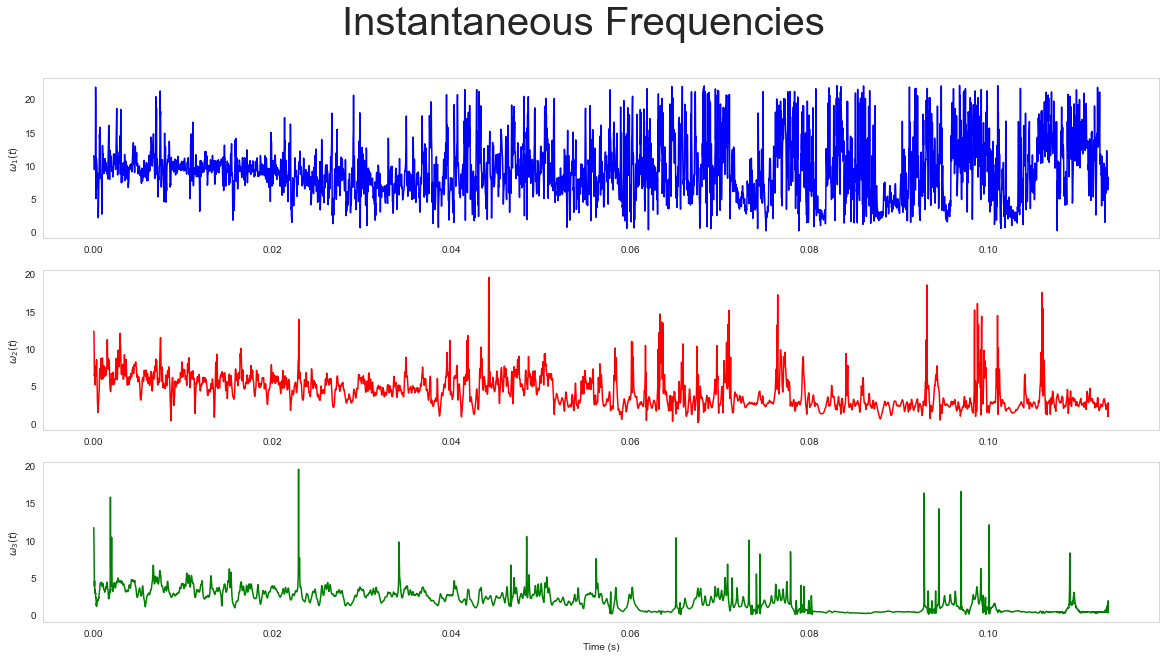

In [43]:
fig, axs = plt.subplots(3,figsize=(20,10))
fig.suptitle('Instantaneous Frequencies', fontsize=40)
axs[0].plot(time_vec, IF_hc_test_f[0][index_seg][:,1],color = 'b')
axs[0].set(ylabel='$\omega_1(t)$')
axs[0].grid(None)
axs[1].plot(time_vec, IF_hc_test_f[1][index_seg][:,1],color = 'r')
axs[1].set(ylabel='$\omega_2(t)$')
axs[1].grid(None)
axs[2].plot(time_vec, IF_hc_test_f[2][index_seg][:,1],color = 'g')
axs[2].set(ylabel='$\omega_3(t)$', xlabel = "Time (s)")
axs[2].grid(None)

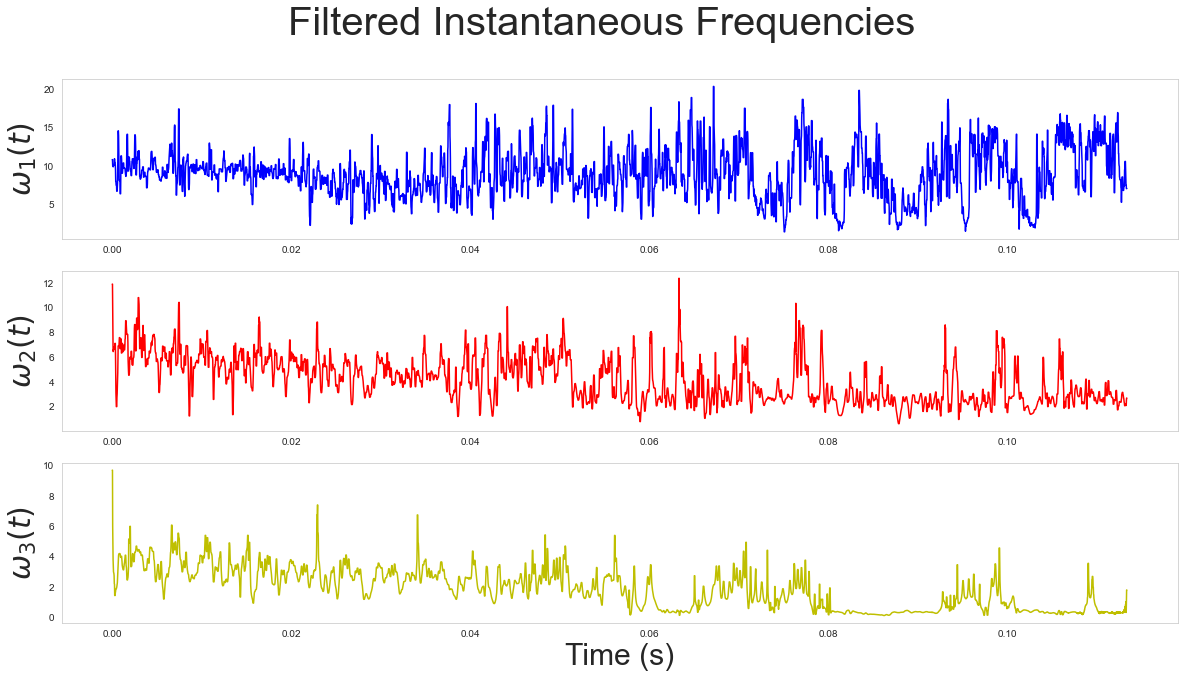

In [44]:
#FILTERED I.F.
fig, axs = plt.subplots(3,figsize=(20,10))
fig.suptitle('Filtered Instantaneous Frequencies', fontsize=40)
axs[0].plot(time_vec, IF_test_hc_f_medfit[0][index_seg],color = 'b')
axs[0].set_ylabel('$\omega_1(t)$', fontsize = 30)
axs[0].grid(None)
axs[1].plot(time_vec, IF_test_hc_f_medfit[1][index_seg],color = 'r')
axs[1].set_ylabel('$\omega_2(t)$', fontsize = 30)
axs[1].grid(None)
axs[2].plot(time_vec, IF_test_hc_f_medfit[2][index_seg],color = 'y')
axs[2].set_ylabel('$\omega_3(t)$', fontsize = 30)
axs[2].set_xlabel('Time (s)', fontsize = 30)
axs[2].grid(None)

In [45]:
filt_if_1 = IF_test_hc_f_medfit[0][index_seg]
filt_if_2 = IF_test_hc_f_medfit[1][index_seg]
filt_if_3 = IF_test_hc_f_medfit[2][index_seg]

In [46]:
w = np.concatenate([filt_if_1,filt_if_2,filt_if_3])
K = 3
data = np.c_[np.tile(time_vec*1000,K),w]  
data.shape

(15000, 2)

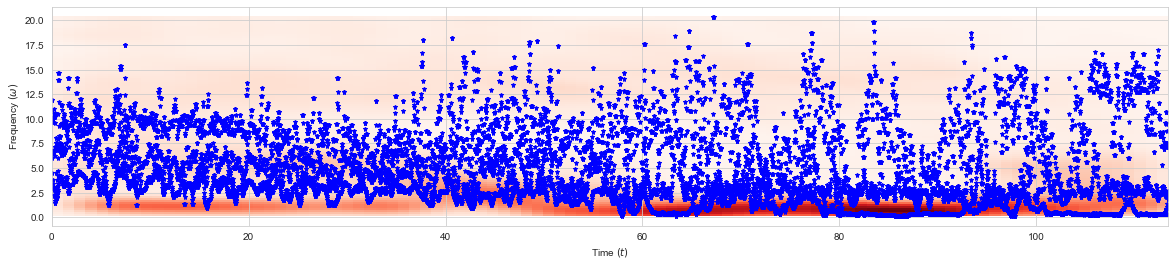

In [79]:
partition = RandomPartition(data,3,4,integrate_box_kde,evaluate_kde)   
partition.plot_KDE((20,20))

In [80]:
#TRUNCATED NORMAL
partition.estimate_partition_CEM_multinom(n_sim = 50, maxiter_CE = 20,tol_ce = 0.0001, 
                                          N_grid_omega = 5000, N_grid_t = 1000, tol_omega = 1, tol_t = 1,
                                          parallel = False,sampler = 'parallel',init_method ='regular')

Initializing partition:  12:59:45
CEM started:  12:59:45
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║12:59:45║ 0.225  ║ 0.212 ║ 0.251 ║ 0.233║ 1.970 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║12:59:55║ 0.222  ║ 0.208 ║ 0.246 ║ 0.228║ 1.926 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║13:00:06║ 0.214  ║ 0.205 ║ 0.251 ║ 0.224║ 2.273 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║13:00:18║ 0.211  ║ 0.197 ║ 0.246 ║ 0.218║ 2.612 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║13:00:32║ 0.208  ║ 0.192 ║ 0.233 ║ 0.213║ 2.022 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║13:00:44║ 0.201  ║ 0.189 ║ 0.228 ║ 0.208║ 2.276 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║13:00:54║ 0.197  ║ 0.183 ║ 0.232 ║ 0.204║ 2.510 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

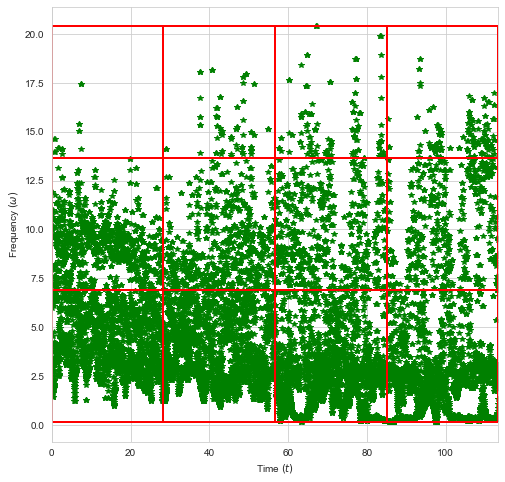

In [81]:
#INITIAL PARITION
partition.plot_partition(partition.breaks_init, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='init_part_tn_ex2.png')

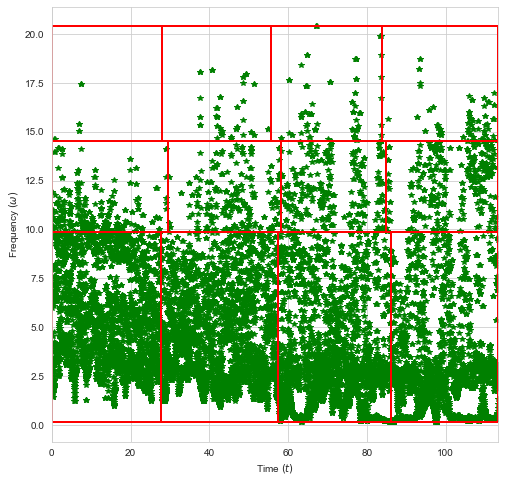

In [82]:
#FINAL PARTITION
partition.plot_partition(partition.breaks_old, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='fin_part_tn_ex2.png')

In [51]:
partition.animate_partition_fitting((8,8) ,save_plot = True, plotpath='plots/')

In [83]:
#MULTINOMIAL
partition.estimate_partition_CEM_multinom(n_sim = 50, maxiter_CE = 20,tol_ce = 0.0001, 
                                          N_grid_omega = 5000, N_grid_t = 1000, tol_omega = 1, tol_t = 1,
                                          parallel = False,sampler = 'parallel',init_method ='regular')

Initializing partition:  13:04:41
CEM started:  13:04:41
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║13:04:41║ 0.225  ║ 0.212 ║ 0.251 ║ 0.233║ 1.970 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║13:04:51║ 0.222  ║ 0.208 ║ 0.246 ║ 0.228║ 1.926 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║13:05:01║ 0.214  ║ 0.205 ║ 0.251 ║ 0.224║ 2.273 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║13:05:11║ 0.211  ║ 0.197 ║ 0.246 ║ 0.218║ 2.612 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║13:05:21║ 0.208  ║ 0.192 ║ 0.233 ║ 0.213║ 2.022 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║13:05:33║ 0.201  ║ 0.189 ║ 0.228 ║ 0.208║ 2.276 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║13:05:44║ 0.197  ║ 0.183 ║ 0.232 ║ 0.204║ 2.510 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

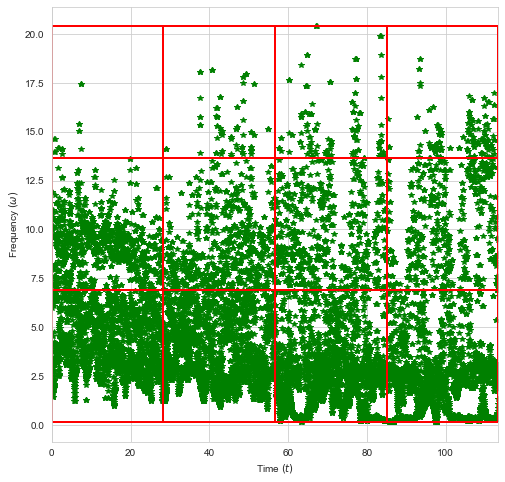

In [84]:
partition.plot_partition(partition.breaks_init, figsize = (8,8),save_plot = True,plotpath= 'plots/',plotname='init_part_mn_ex2.png')

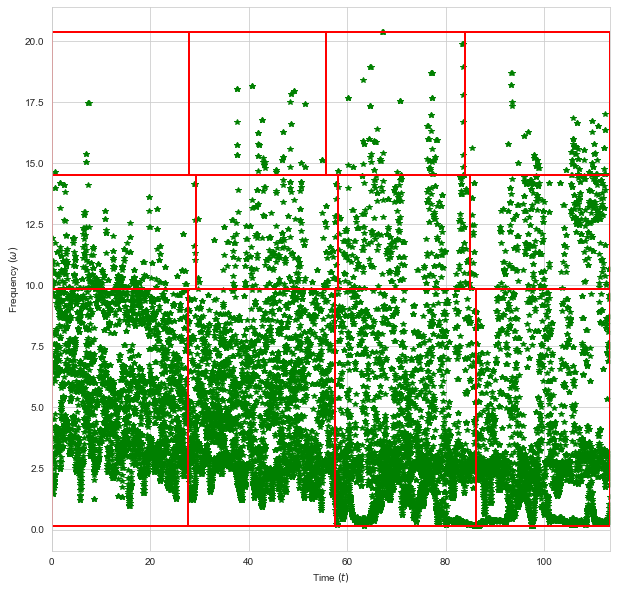

In [85]:
partition.plot_partition(partition.breaks_old, figsize = (10,10),save_plot = True,plotpath= 'plots/',plotname='fin_part_mn_ex2.png')

In [86]:
partition.animate_partition_fitting((8,8) ,save_plot = True, plotpath='plots/')

In [ ]:
######################################################################################
#CONSTRUCT THE NEW SET OF IMFs with the last obtained parition (the multinomial one) #
######################################################################################

In [74]:
part_final = partition.breaks_old[0]

In [75]:
#function for band-limited IMFs

def IMF_BL_extraction(vec_partition, IFs_list, IMFs_list):  #you migh have to add the lopp for the segments
    IMFs_sep = [[np.zeros(5000), np.zeros(5000), np.zeros(5000)] for i in range(0,3)]
    ind_imfs = [ [np.where((vec_partition[0] <= IFs_list[j]) &  (IFs_list[j] < vec_partition[1]))[0],
                  np.where((vec_partition[1] < IFs_list[j]) &  (IFs_list[j] < vec_partition[2]))[0], 
                  np.where((vec_partition[2] < IFs_list[j]) &  (IFs_list[j] <= vec_partition[3]))[0] ] for j in range(0,3)] 
    for j in range(0,3):
        for i in range(0,3):
            IMFs_sep[j][i][ind_imfs[j][i]] = IMFs_list[j][ind_imfs[j][i]]
            
    
    IMF_BL = [sum(x) for x in zip(*IMFs_sep)] 
    return(IMF_BL)           


In [61]:
IMF_list = [IMF_test_hc_f[0][index_seg],IMF_test_hc_f[1][index_seg],IMF_test_hc_f[2][index_seg]]

In [62]:
IF_list = [filt_if_1,filt_if_2,filt_if_3]

In [71]:
IMF_BL = IMF_BL_extraction(part_final, IF_list, IMF_list)

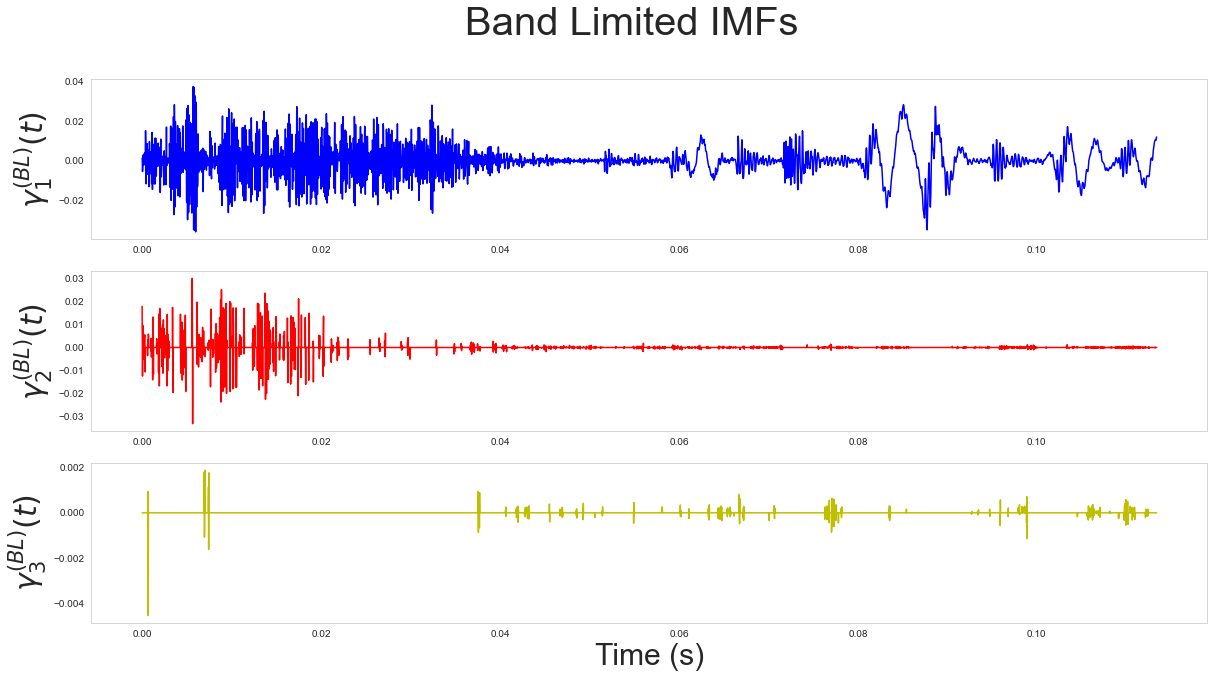

In [72]:
fig, axs = plt.subplots(3,figsize=(20,10))
fig.suptitle('Band Limited IMFs', fontsize=40)
axs[0].plot(time_vec, IMF_BL[0],color = 'b')
axs[0].set_ylabel('$\gamma_1^{(BL)}(t)$', fontsize = 30)
axs[0].grid(None)
axs[1].plot(time_vec, IMF_BL[1],color = 'r')
axs[1].set_ylabel('$\gamma_2^{(BL)}(t)$', fontsize = 30)
axs[1].grid(None)
axs[2].plot(time_vec, IMF_BL[2], color = 'y')
axs[2].set_ylabel('$\gamma_3^{(BL)}(t)$', fontsize = 30)
axs[2].set_xlabel('Time (s)', fontsize = 30)
axs[2].grid(None)

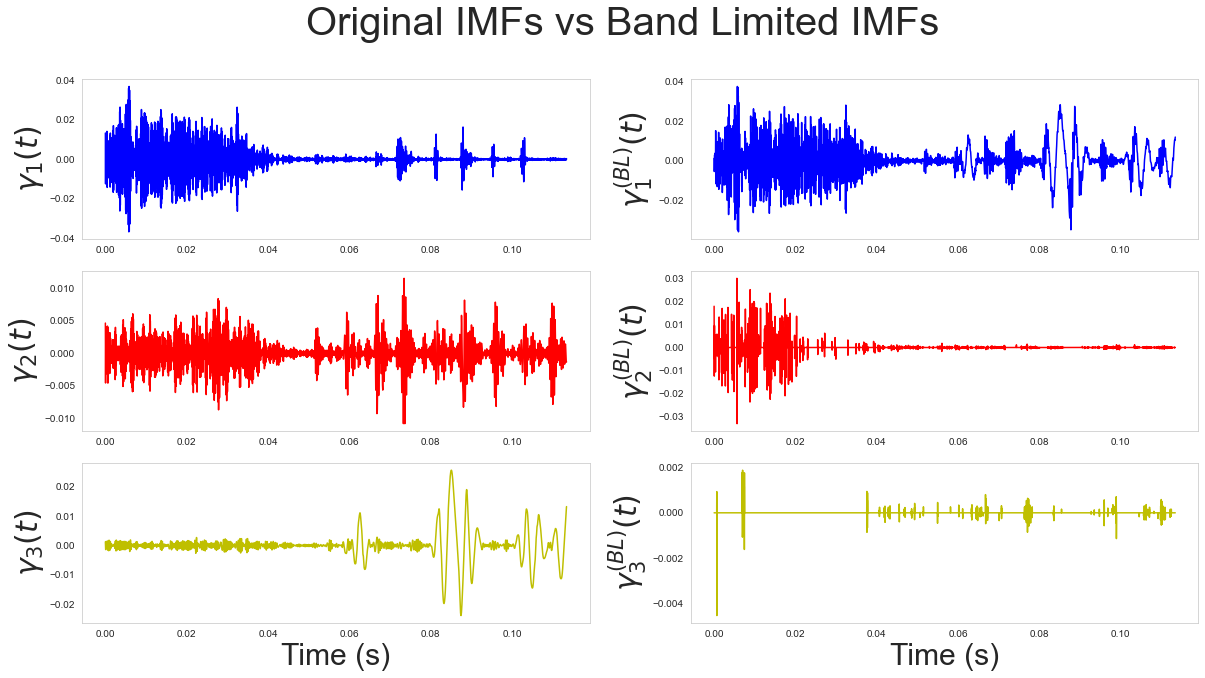

In [73]:
fig, axs = plt.subplots(3,2,figsize=(20,10))
fig.suptitle('Original IMFs vs Band Limited IMFs', fontsize=40)
axs[0,0].plot(time_vec, IMF_test_hc_f[0][index_seg],color = 'b')
axs[0,0].set_ylabel('$\gamma_1(t)$', fontsize = 30)
axs[0,0].grid(None)
axs[0,1].plot(time_vec, IMF_BL[0],color = 'b')
axs[0,1].set_ylabel('$\gamma_1^{(BL)}(t)$', fontsize = 30)
axs[0,1].grid(None)
axs[1,0].plot(time_vec, IMF_test_hc_f[1][index_seg],color = 'r')
axs[1,0].set_ylabel('$\gamma_2(t)$', fontsize = 30)
axs[1,0].grid(None)
axs[1,1].plot(time_vec, IMF_BL[1],color = 'r')
axs[1,1].set_ylabel('$\gamma_2^{(BL)}(t)$', fontsize = 30)
axs[1,1].grid(None)
axs[2,0].plot(time_vec, IMF_test_hc_f[2][index_seg],color = 'y')
axs[2,0].set_ylabel('$\gamma_3(t)$', fontsize = 30)
axs[2,0].set_xlabel('Time (s)', fontsize = 30)
axs[2,0].grid(None)
axs[2,1].plot(time_vec, IMF_BL[2],color = 'y')
axs[2,1].set_ylabel('$\gamma_3^{(BL)}(t)$', fontsize = 30)
axs[2,1].set_xlabel('Time (s)', fontsize = 30)
axs[2,1].grid(None)